# Toonify (Cel-Shading)
The goal of the algorithm is to create a cel shaded image out of a normal image or well shaded object.\
**=> Check the last cell for a easy-to-use function**

### Import the picture
(Please remember to run all the cells again after choosing a new image)

In [2]:


# select the picture
#img = cv2.imread("teapot_gray.png")
#img = cv2.imread("car.jpeg")
#img = cv2.imread("face.jpg")
#img = cv2.imread("face2.jfif")
#img = cv2.imread("dolphin.jpg")
#img = cv2.imread("teapot_white.png")

### 1) Edges
First, we convert the picture to levels of gray to enable a better detection of the edges without any disruptive colors.\
\
Second, we use the **medianBlur** algorithm to blur any unwanted noise which could be interpreted as edges. MedianBlur makes sure to protect edges but blur surfaces and everything else. It uses a 13x13 pixel matrix (neighborhood) and replace each pixel with the median of its neighboring pixels. The median filter uses BORDER_REPLICATE internally to cope with border pixels.\
\
Third, we use **Canny** algorithm to finally detect edges. Eventhough this edge detection algorithm uses a gaussian filter to reduce noise, median filter before results in clearer edges. In stage two, Canny derives horizontal and vertical gradients by using Sobel kernel to find both edge gradient and direction for each pixel.\
In the end Canny uses thresholding to decide which are all edges are really edges and which are not: If a pixel's value is below the minV it is safe no edge, and if its value is above maxV it's safe an edge. For every pixel between the two thresholds, Canny checks if it is connecting to a "safe edge". In this case it is considered as a part of an edge.


In [6]:
def detect_edges(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 13)
    # Edge detection with canny
    edges = cv2.Canny(gray, 50, 80)
    # an invertation is necessairy to have black edges and not white ones
    edges = (255-edges)
    return edges

### 2) Color stuff
Now, we are carrying about the colors in the image.\
First, we blur also the color part with the already described algorithm.

In [7]:
def coloring(img):
    color = img.copy()
    # smooth the colors within one color area
    for _ in range(2):
        color = cv2.medianBlur(color, 7)

    # quantise colors:
    Z = color.reshape((-1,3))

    # convert to np.float32
    Z = np.float32(Z)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 4
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    color_res = res.reshape((color.shape))
    return color_res

### 3) All together
Now, we bring all together. We use the bitwise_and to put the color part and the edge part into one picture. The black edges are used as a mask in the AND operations between to instances of the same color picture.

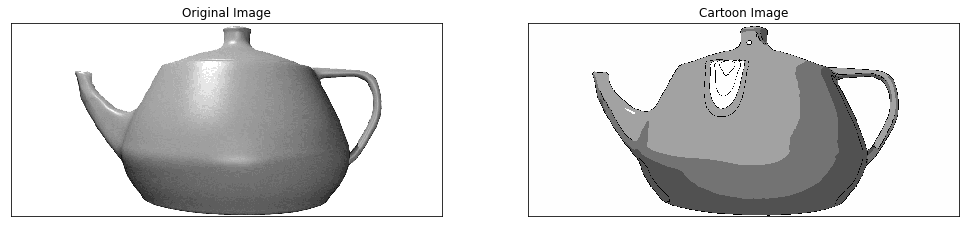

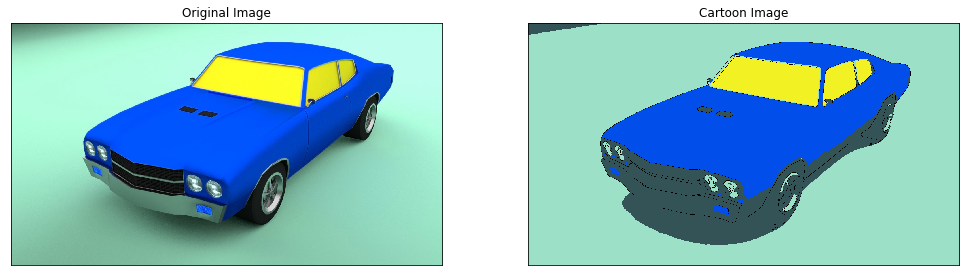

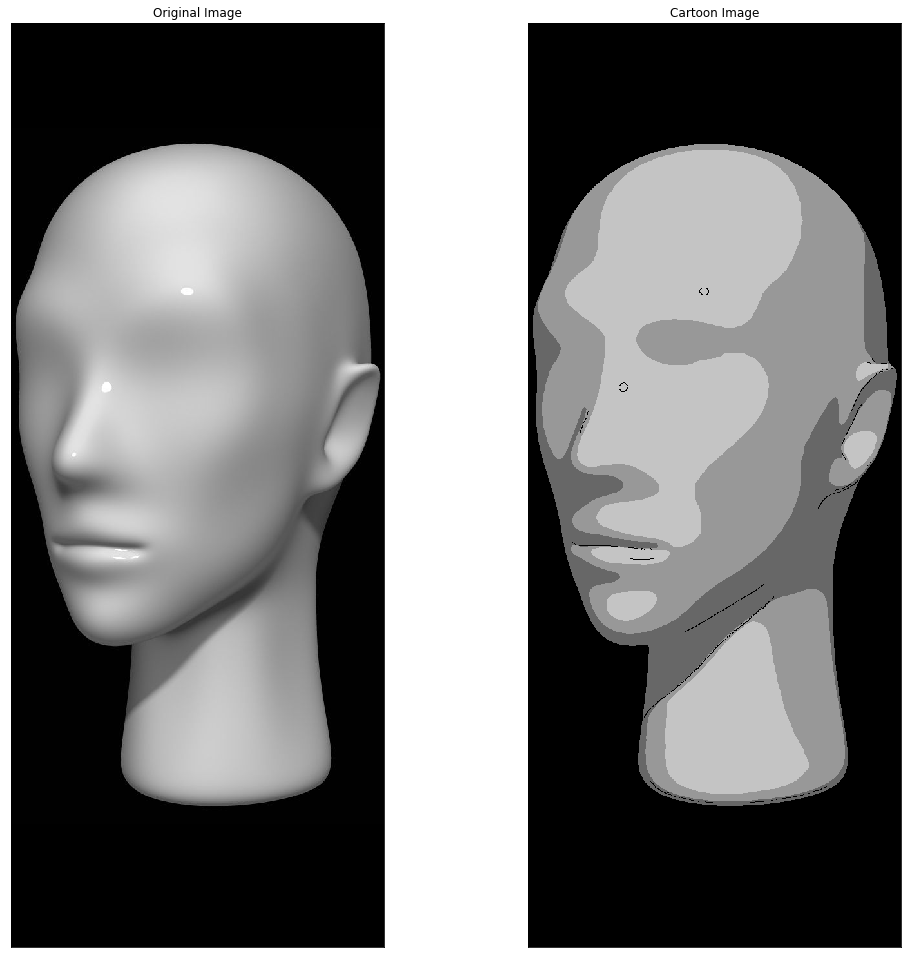

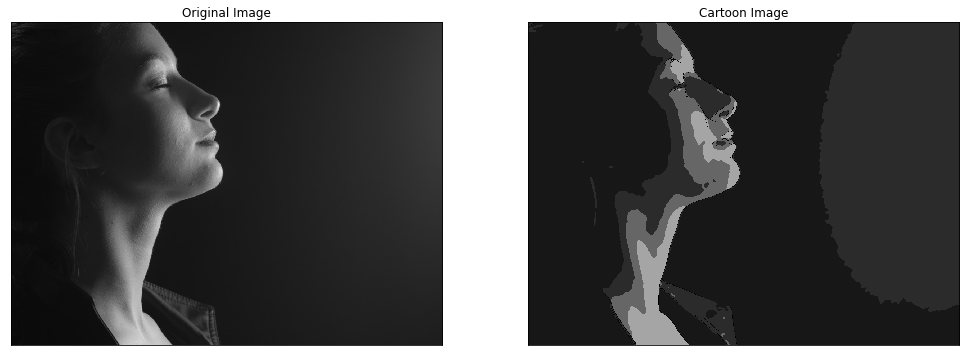

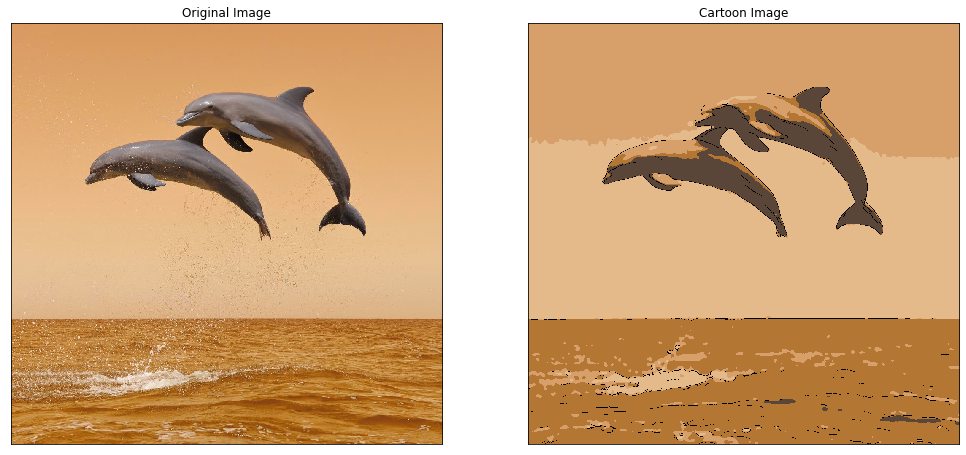

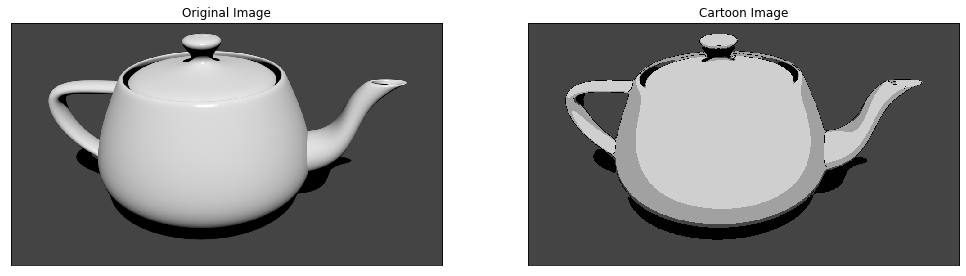

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def toonify(image):
    img = cv2.imread(image)
    edges = detect_edges(img)
    colors = coloring(img)
    cartoon = cv2.bitwise_and(colors, colors, mask=edges)
    return img,cartoon

def show(img, cartoon):
    cv2.imshow("Image", img)
    cv2.imshow("Cartoon", cartoon)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

images = ["teapot_gray.png","car.jpeg","face.jpg","face2.jfif","dolphin.jpg","teapot_white.png"]
for picture in images:
    img, result = toonify(picture)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,17))
    ax1.imshow(img)
    ax1.set_title("Original Image"), 
    ax1.set_xticks([]), ax1.set_yticks([])
    ax2.imshow(result)
    ax2.set_title("Cartoon Image"), 
    ax2.set_xticks([]), ax2.set_yticks([])
    